# Import Libraries

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [45]:
from sklearn.metrics import roc_auc_score

# Read Data

In [46]:
import os

os.chdir('C:/Users/ritshetty/Desktop/iSchool FALL 19/IST 707 Data Analytics/HW 3')
train = pd.read_csv('Kaggle-digit-train-sample-small-1400.csv')
test  = pd.read_csv('Kaggle-digit-test-sample1000.csv')

# EDA

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 8.4 MB


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, label to pixel783
dtypes: float64(784), object(1)
memory usage: 6.0+ MB


In [49]:
train.dtypes.value_counts()

int64    785
dtype: int64

In [50]:
test.dtypes.value_counts()

float64    784
object       1
dtype: int64

In [51]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [52]:
test.isnull().any().describe()

count      785
unique       2
top       True
freq       784
dtype: object

In [53]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Preprocessing

In [55]:
x_train = train.drop(['label'],axis=1)

In [56]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y_train = train['label']
y_train.head()

0    7
1    1
2    6
3    5
4    0
Name: label, dtype: int64

In [58]:
x_test = test.drop(['label'],axis=1)


In [59]:
x_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
x_test.isnull().any().describe()

count      784
unique       1
top       True
freq       784
dtype: object

In [61]:
x_test.fillna(0, inplace=True)

In [62]:
x_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [63]:
y_train.value_counts().describe()

count     10.000000
mean     140.000000
std       11.264497
min      127.000000
25%      132.500000
50%      138.500000
75%      143.500000
max      167.000000
Name: label, dtype: float64

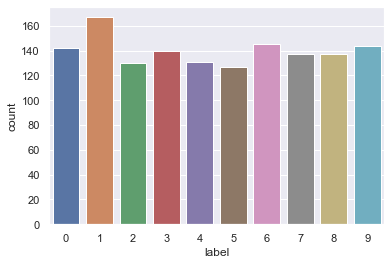

In [64]:
sns.set()
sns.countplot(x="label", data=y_train.to_frame())

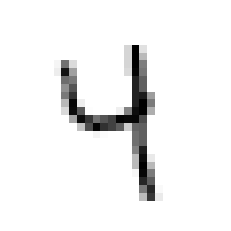

In [65]:
digit = x_train.iloc[1000] 
digit_image = digit.values.reshape(28, 28) 
plt.imshow(digit_image, 
           cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

# Feature Engineering 

#####  Since algorithms work more effectively with data between 0-1 rather than a huge range of number such as 0-255 we scale our data using a minmax scaler method but since our min=0 we are just dividing by 255

In [66]:
x_train_scaled = x_train/255.0


x_test_scaled = x_test/255.0

In [67]:
x_train_scaled.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:

x_test_scaled.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Running the Model

## Naive Bayes

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
cross_val_score(gnb, x_train_scaled, y_train, scoring='accuracy', cv=10).mean()

0.5993308617327857

In [201]:
score1 =cross_val_score(mnb, x_train_scaled, y_train, scoring='accuracy', cv=10).mean()*100
print('Accuracy' + " " + str(score1) + " " + "%")

Accuracy 82.28402593115526 %


In [71]:
mnb.fit(x_train_scaled, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_features=5, random_state=16)
cross_val_score(model, x_train_scaled, y_train, cv=10, scoring='accuracy').mean()


0.9061687309773825

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [35]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)

In [36]:
rf_random.fit(x_train_scaled, y_train)

C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.4min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=5,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
 

In [37]:
cross_val_score(rf_random, x_train_scaled, y_train, cv=10, scoring='accuracy').mean()

C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.7min finished
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.7min finished
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.7min finished
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.7min finished
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.7min finished
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.7min finished
C:\Users\ritshetty\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished


0.9183945302035698

In [38]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

GridSearch Cross Validation

In [74]:
param_grid = {
    'bootstrap': [False],
    'max_depth': [30,50,90],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,4,6],
    'n_estimators': [500,700, 1000]
}

In [75]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [79]:
grid_search.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  4.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=5,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=16,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap'

In [76]:
cross_val_score(grid_search, x_train_scaled, y_train, cv=5, scoring='accuracy').mean()

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  4.3min finished


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  4.2min finished


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  4.5min finished


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  4.4min finished


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  4.1min finished


0.9155808946829055

In [80]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [200]:
score2 = grid_search.best_score_
score2 = score2*100
print('Accuracy' + " " + str(score2) + " " + "%")

Accuracy 91.71428571428571 %


#### Support Vector Machine

#### LinerSVM

In [134]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler

#### Preprocessing for SVM

#### SVM needs Normalized data the preprossesing step is unique to SVM algorithm

In [136]:
scaler = StandardScaler()  
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)  


In [91]:
lin_clf = svm.LinearSVC()
lin_clf


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [137]:
folds = model_selection.ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
param_grid = {'C':[0.25,0.5,0.75,1],'penalty':['l2'], 'max_iter':[1500]}

grid_lsv = GridSearchCV(lin_clf,param_grid,cv=folds)


In [138]:
grid_lsv.fit(x_train_std,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
             error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.25, 0.5, 0.75, 1], 'max_iter': [1500],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [139]:
grid_lsv.best_params_

{'C': 0.25, 'max_iter': 1500, 'penalty': 'l2'}

In [140]:
grid_lsv.best_score_

0.7971428571428572

In [188]:
C = np.arange(0.05,1)
train_results_svm =[]
for n in C:
   model = svm.LinearSVC(C=n)
   model.fit(x_train_std, y_train)
   acc = cross_val_score(model,x_train_std, y_train, cv=folds).mean()*100
   train_results_svm.append(acc)

In [189]:
train_results_svm

[81.0]

#### SVM RBF Kernel

In [153]:
rbf_clf = svm.SVC()

In [155]:
gamma = [0.001,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
train_results_svm =[]
train_results_svmC2 = []
train_results_svmC3= []
for n in gamma:
   model1 = SVC(C=0.1,kernel='rbf',gamma=n,cache_size=2000)
   model1.fit(x_train_std,y_train)
   acc = cross_val_score(model1, x_train_std, y_train, cv=folds).mean()*100 
   train_results_svm.append(acc)
   model2 = SVC(C=0.5,kernel='rbf',gamma=n,cache_size=2000)
   acc2 = cross_val_score(model2, x_train_std, y_train, cv=folds).mean()*100
   train_results_svmC2.append(acc2)
   model3 = SVC(C=1,kernel='rbf',gamma=n,cache_size=2000)
   acc3 = cross_val_score(model3, x_train_std, y_train, cv=folds).mean()*100
   train_results_svmC3.append(acc3)

In [163]:
train_results_svm

[63.047619047619044,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526]

In [164]:
train_results_svmC2

[85.0,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526]

In [165]:
train_results_svmC3

[87.09523809523809,
 12.190476190476192,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526,
 11.523809523809526]

In [166]:
param_grid = {'C':[1],'gamma':[0.003,0.005,0.025,0.05]}
svm_clf = GridSearchCV(model3,param_grid,cv=folds,scoring = 'accuracy')

In [167]:
svm_clf.fit(x_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1, cache_size=2000, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=1,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1], 'gamma': [0.003, 0.005, 0.025, 0.05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [168]:
svm_clf.best_params_

{'C': 1, 'gamma': 0.003}

In [169]:
svm_clf.best_score_

0.839047619047619

In [176]:
 model4 = SVC(C=1,kernel='rbf',gamma=0.001,cache_size=2000)

In [183]:
model4.fit(x_train_std, y_train)

SVC(C=1, cache_size=2000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [199]:
score3 = cross_val_score(model4, x_train_std, y_train, cv=folds).mean()*100
print('Accuracy' + " " + str(score3) + " " + "%")

Accuracy 87.09523809523809 %


### Algorithm Performace Comparison

In [238]:
comp = pd.DataFrame( { "Naive Bayes" :score1,
                               "Random Forest" : score2,
                           "SVM RBF" : score3}, index=[1])

In [239]:
comp

,Naive Bayes,Random Forest,SVM RBF
1,82.284026,91.714286,87.095238


#### Higest Accuracy of 91.7 % is attained using Random forest Algorithm compared to the other two so our best performing model hence is Random Forest

#### By intuition and observation Time required by Naive bayes was the least followed by SVM and then most time consuming being Random Forest 
##### The reason for Random Forest being most time consuming  because we increse number of trees and complexity to get better performance. Also Random Forest are robust to Overfitting on the contrary based of C and Kernal funtion selection SVM might tend to overfit.
##### whereas we have to do multiple parameter tuning for SVM to perform better. Also, due to high number of  fatures SVM does not outperform Random forest

## Predicting Results using Random Forest - Best Model 
#### Based on Accuracy calculated using cross validation

In [245]:
y_pred = grid_search.predict(x_test_scaled)
y_pred[0:5]

array([2, 0, 9, 4, 3], dtype=int64)

Above are the predicted results for test set